In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [19]:
tag_list = ['^GSPC', '^IXIC', '^GDAXI']
weights = [0.25, 0.25, 0.25]
working_days = 250
df_tag = pd.DataFrame()

In [20]:
for tag in tag_list:
    df_tag[tag] = wb.DataReader(tag, data_source='yahoo', start='1995-01-01')['Adj Close']
df_tag

,^GSPC,^IXIC,^GDAXI
Date,,,
1995-01-03,459.109985,743.580017,2068.919922
1995-01-04,460.709991,745.840027,2072.899902
1995-01-05,460.339996,745.659973,2051.459961
1995-01-06,460.679993,749.690002,2058.199951
1995-01-09,460.829987,752.090027,2053.409912
...,...,...,...
2022-08-09,4122.470215,12493.929688,13534.969727
2022-08-10,4210.240234,12854.799805,13700.929688
2022-08-11,4207.270020,12779.910156,13694.509766


In [21]:
df_tag.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6954 entries, 1995-01-03 to 2022-08-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   6954 non-null   float64
 1   ^IXIC   6954 non-null   float64
 2   ^GDAXI  6822 non-null   float64
dtypes: float64(3)
memory usage: 217.3 KB


In [22]:
df_tag.describe()

,^GSPC,^IXIC,^GDAXI
count,6954.000000,6954.000000,6822.000000
mean,1668.992938,3982.460594,7383.781788
std,930.073334,3335.187457,3596.580649
min,459.109985,743.580017,1911.699951
25%,1096.899963,1909.947510,4664.219971
50%,1328.289978,2549.459961,6459.255127
75%,2067.619934,4895.565063,10146.679932
max,4796.560059,16057.440430,16271.750000


In [23]:
df_tag_norm = (df_tag / df_tag.iloc[0] * 100)

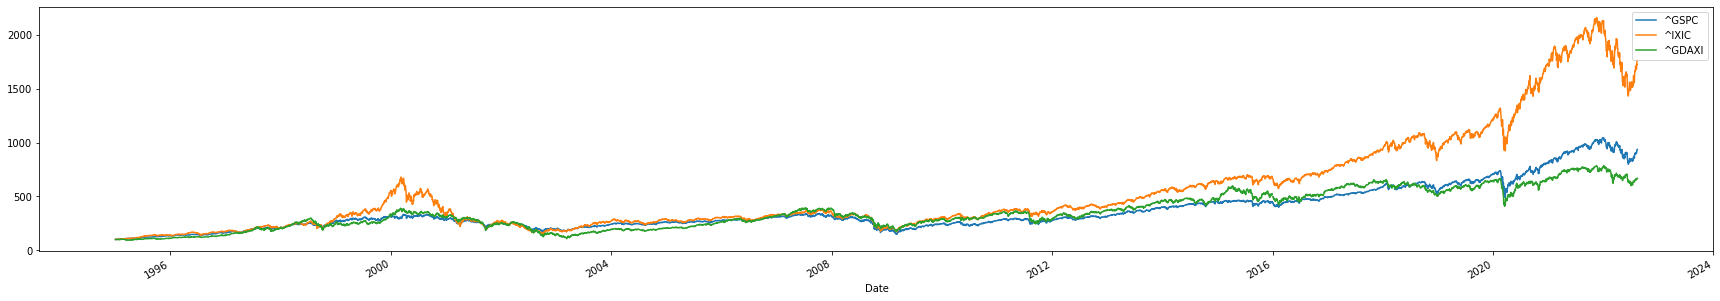

In [24]:
df_tag_norm.plot(figsize=(30, 5))
plt.show()

In [25]:
df_simple_return = (df_tag_norm / df_tag.shift(1)) - 1
df_simple_return

,^GSPC,^IXIC,^GDAXI
Date,,,
1995-01-03,NaN,NaN,NaN
1995-01-04,-0.781428,-0.865107,-0.951573
1995-01-05,-0.782362,-0.865548,-0.952166
1995-01-06,-0.782026,-0.864789,-0.951507
1995-01-09,-0.782116,-0.865085,-0.951778
...,...,...,...
2022-08-09,-0.783113,-0.867116,-0.952205
2022-08-10,-0.777550,-0.861631,-0.951073
2022-08-11,-0.782341,-0.866299,-0.951688


In [ ]:
df_simple_return = df_simple_return.mean() * working_days